In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
"""for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))"""

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"for dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))"

In [2]:
!pip install opencv-contrib-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 MB 29.5 MB/s eta 0:00:00


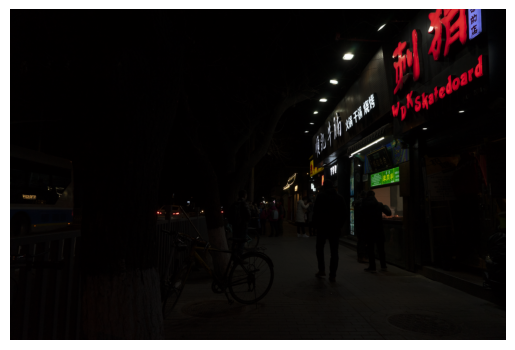

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

numb = 18

dark_image = cv2.imread(f"/kaggle/input/dark-face-dataset/image/{numb}.png")

plt.imshow(cv2.cvtColor(dark_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


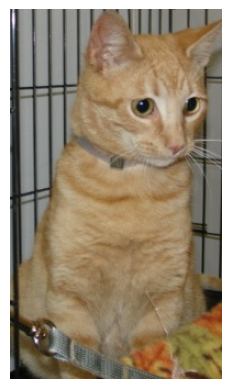

In [4]:
natural_image = cv2.imread("/kaggle/input/natural-images/natural_images/cat/cat_0301.jpg")

plt.imshow(cv2.cvtColor(natural_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

Depth detection requires binocular vision or neural network prediction. Decide on later...

Foreground isolation might require some manual input by which you select an area where the foreground actually is... Would need a different algorithm

Simple shapes: could build a voronoi diagram but I don't think that's what we are going for. Otherwise it is for matching specific shapes

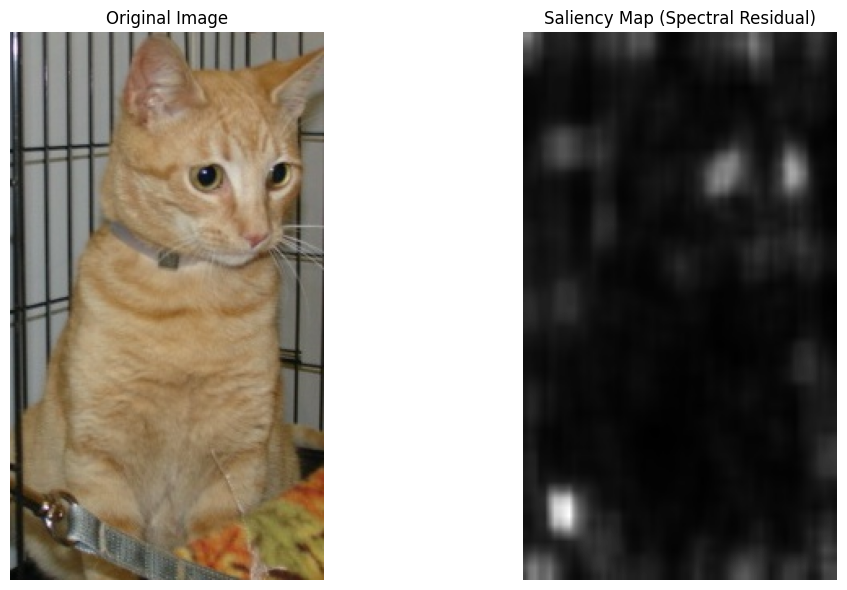

In [5]:
saliency_detector = cv2.saliency.StaticSaliencySpectralResidual_create()


# Compute the saliency map
(success, saliency_map) = saliency_detector.computeSaliency(natural_image)

# Normalize the saliency map for better visualization
saliency_map = (saliency_map * 255).astype("uint8")

# Display the original image and saliency map
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(natural_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# Saliency map
plt.subplot(1, 2, 2)
plt.imshow(saliency_map, cmap="gray")
plt.title("Saliency Map (Spectral Residual)")
plt.axis("off")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'retina parvo out')

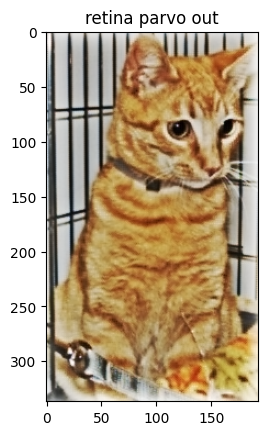

In [6]:
retina = cv2.bioinspired.Retina.create((natural_image.shape[1], natural_image.shape[0]))
 
# the retina object is created with default parameters. If you want to read
# the parameters from an external XML file, uncomment the next line
#retina.setup('MyRetinaParameters.xml')
 
# feed the retina with several frames, in order to reach 'steady' state
for i in range(20):
    retina.run(natural_image)
 
# get our processed image :)
retinaOut_parvo = retina.getParvo()
 
# show both the original image and the processed one
#plt.imshow('image', natural_image)
plt.imshow(cv2.cvtColor(retinaOut_parvo, cv2.COLOR_BGR2RGB))
plt.title('retina parvo out')
 
# wait for a key to be pressed and exit
#cv2.waitKey(0)
#cv2.destroyAllWindows()
 
# write the output image on a file
#cv2.imwrite('checkershadow_parvo.png', retinaOut_parvo)

Text(0.5, 1.0, 'retina magno out')

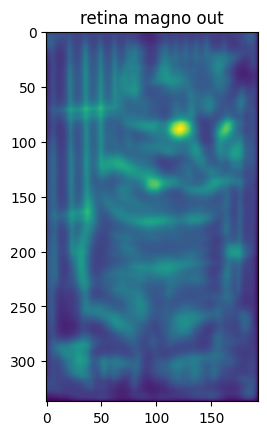

In [7]:
retinaOut_magno = retina.getMagno()
plt.imshow(retinaOut_magno)
plt.title("retina magno out")

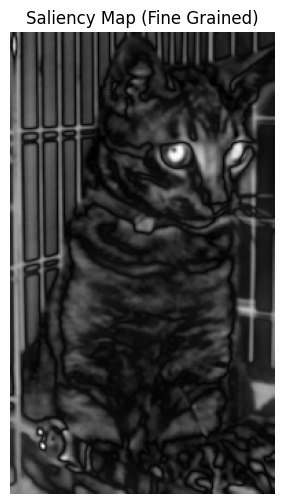

In [8]:
# Static Saliency Fine Grained
saliency_detector_fine = cv2.saliency.StaticSaliencyFineGrained_create()

# Compute the saliency map
(success_fine, saliency_map_fine) = saliency_detector_fine.computeSaliency(natural_image)

# Normalize the saliency map
saliency_map_fine = (saliency_map_fine * 255).astype("uint8")

# Display the fine-grained saliency map
plt.figure(figsize=(6, 6))
plt.imshow(saliency_map_fine, cmap="gray")
plt.title("Saliency Map (Fine Grained)")
plt.axis("off")
plt.show()

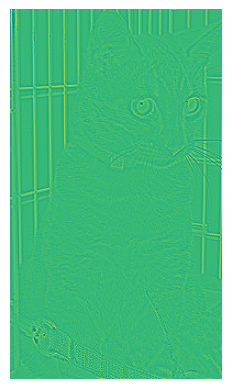

In [9]:
nat_gray = cv2.cvtColor(natural_image, cv2.COLOR_BGR2GRAY)
nat_edges = cv2.Laplacian(nat_gray, cv2.CV_64F)

plt.imshow(nat_edges)
plt.axis("off")
plt.show()

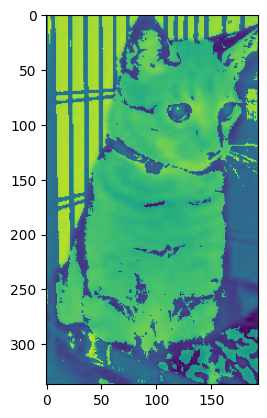

In [10]:
blue, green, red = cv2.split(natural_image)

red_green = red - green
blue_yellow = blue - (red + green) / 2
brightness = (red + green + blue) / 3

plt.imshow(blue_yellow)

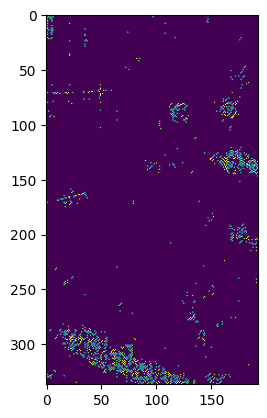

In [11]:
import skimage.filters as filters
from skimage import io, color
gabor_response, _ = filters.gabor(nat_gray, frequency=0.6, theta=np.pi/4)

plt.imshow(gabor_response)

In [12]:
def decomposition(image_url):
    #Load Image
    image = cv2.imread(image_url)

    #Grayscale Image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    #Edge detect Image
    edges = cv2.Canny(image, 100, 200)

    #Color split
    blue, green, red = cv2.split(image)

    #Color Opponency
    red_green = red - green
    blue_yellow = blue - (red + green) / 2
    value = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)[:,:,-1]

    #Texture detection
    gabor_response, _ = filters.gabor(gray, frequency=0.6, theta=np.pi/4)

    #Saliency
    # Static Saliency Fine Grained
    saliency_detector_fine = cv2.saliency.StaticSaliencyFineGrained_create()
    
    # Compute the saliency map
    (success_fine, saliency_map_fine) = saliency_detector_fine.computeSaliency(image)
    
    # Normalize the saliency map
    saliency_map_fine = (saliency_map_fine * 255).astype("uint8")

    #Details and Motion: Parvocellular and Magnocellular pathways
    retina = cv2.bioinspired.Retina.create((image.shape[1], image.shape[0]))

    for i in range(20):
        retina.run(image)

    retinaOut_parvo = retina.getParvo()
    retinaOut_parvo = cv2.cvtColor(retinaOut_parvo, cv2.COLOR_BGR2RGB)
    retinaOut_magno = retina.getMagno()  
    

    return red_green, blue_yellow, value, gray, edges, gabor_response, saliency_map_fine, retinaOut_parvo, retinaOut_magno

['red_green, blue-yellow, value']
['gray, edges, gabor_response']


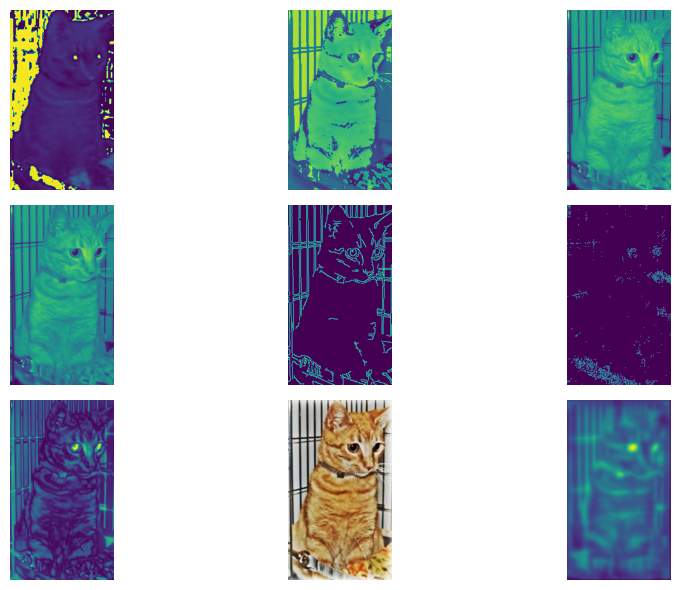

In [13]:
cat_url = "/kaggle/input/natural-images/natural_images/cat/cat_0301.jpg"

decompositions = decomposition(cat_url)
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10, 6))
np.vectorize(lambda ax:ax.axis('off'))(ax)
k = 0
for i in range(3):
    for j in range(3):
        try:
            ax[i,j].imshow(decompositions[k])
        except:
            None
        #plt.axis("off")
        k += 1
fig.tight_layout()
print(["red_green, blue-yellow, value"])
print(["gray, edges, gabor_response"])

#plt.imshow(decompositions[-1])

['red_green, blue-yellow, value']
['gray, edges, gabor_response']


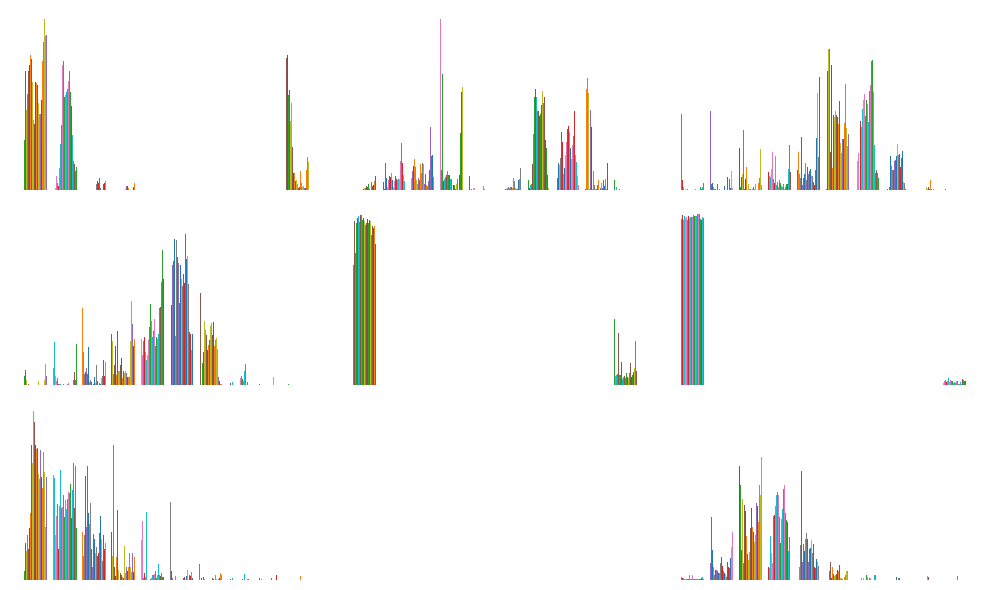

In [14]:
decompositions = decomposition(cat_url)
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10, 6))
np.vectorize(lambda ax:ax.axis('off'))(ax)
k = 0
for i in range(3):
    for j in range(3):
        try:
            ax[i,j].hist(decompositions[k])
        except:
            None
        #plt.axis("off")
        k += 1
fig.tight_layout()
print(["red_green, blue-yellow, value"])
print(["gray, edges, gabor_response"])

['red_green, blue-yellow, value']
['gray, edges, gabor_response']


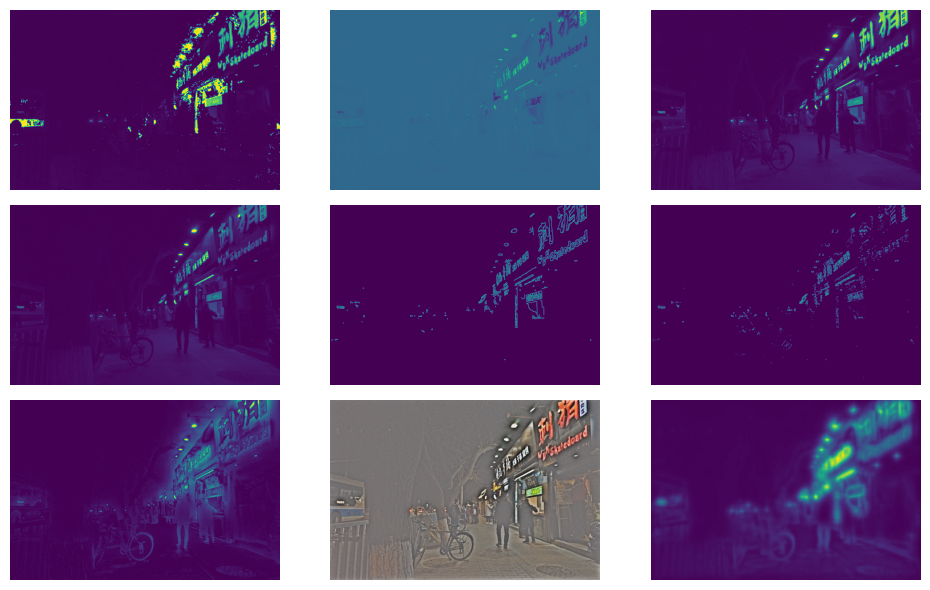

In [15]:
numb = 18
dark_url = f"/kaggle/input/dark-face-dataset/image/{numb}.png"
decompositions = decomposition(dark_url)
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10, 6))
np.vectorize(lambda ax:ax.axis('off'))(ax)
k = 0
for i in range(3):
    for j in range(3):
        try:
            ax[i,j].imshow(decompositions[k])
        except:
            None
        #plt.axis("off")
        k += 1
fig.tight_layout()
print(["red_green, blue-yellow, value"])
print(["gray, edges, gabor_response"])

['red_green, blue-yellow, value']
['gray, edges, gabor_response']


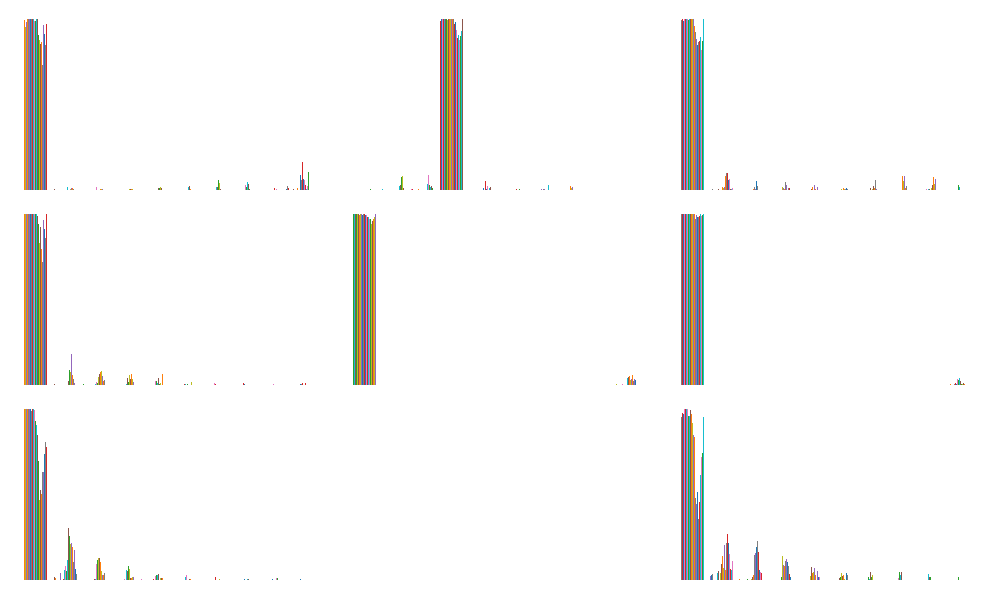

In [16]:
numb = 18
dark_url = f"/kaggle/input/dark-face-dataset/image/{numb}.png"
decompositions = decomposition(dark_url)

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10, 6))
np.vectorize(lambda ax:ax.axis('off'))(ax)
k = 0
for i in range(3):
    for j in range(3):
        try:
            ax[i,j].hist(decompositions[k])
        except:
            None
        #plt.axis("off")
        k += 1
fig.tight_layout()
print(["red_green, blue-yellow, value"])
print(["gray, edges, gabor_response"])

### Observations

RG-BY is not balanced in the darker image

Value is not balanced in the darker image

Gray value does not match up with actual value

Edges completely indistinguishable. With Canny vs Laplacian more edges seen with Canny but still very unbalanced with respect to sides of the image.

Texture doesn't give much information past what we can see.

## Questioning

Is it possible to reject that there is an object that edges are detecting using bayesian estimation / causal modelling? If we propose the hypothesis that there is not an object being enclosed by edges, when do we have to reject that hypothesis?